In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore any warnings

# Read and explore the given dataset. ( Rename column/add headers, plot histograms, find data characteristics).

In [2]:
data=pd.read_csv("Electronic_dataset.csv") # Reading dataset
data.sample(10)

,user_id,prod_id,ratings,timestamp
9798,AFWXFJ3T27K45,B0090Z39EA,5.0,1356307200
438833,A1JZGJHO36SVLH,B002V92Z2O,5.0,1312502400
108932,A21B8AV7E3MPXE,B00D3F7D7M,4.0,1404604800
291235,A2YX1NHIOH61AV,B00009W3DV,5.0,1262822400
331575,A2YGFW5XMYE44I,B00BW6KCTU,1.0,1377734400
22210,A2S0OTNI5XA7CA,B006YZTC0Y,5.0,1358467200
175987,A3L7IGR29TJEFM,B000QYYP7O,1.0,1285632000
412823,A36GDAX45PSHY,B00G57BN1M,5.0,1402444800
186469,AKT1Q31LKQAY,B00B0O1BWG,2.0,1387324800
486651,AQ13JOPVF4GV1,B005GCSZD6,5.0,1389052800


In [3]:
columns=['userId', 'productId', 'ratings','timestamp']
data.columns=columns
data.head(2)

,userId,productId,ratings,timestamp
0,A3L1GVWVJKWZZS,B0058UUR6E,5.0,1364774400
1,A08831071BVKZMKNCPI5S,B009ID0VVS,5.0,1357257600


## Ineferences:-
### 1.Columns renamed for convenience.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     500000 non-null  object 
 1   productId  500000 non-null  object 
 2   ratings    500000 non-null  float64
 3   timestamp  500000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


## Inferences:-
### 1. ratings is of float type.
### 2. userId and productId are of object type.
### 3. timestamp is not necessary for recommendations and hence can be dropped.

In [5]:
data.drop('timestamp',axis=1,inplace=True)

## Inferences:-
### 1. timestamp column dropped.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ratings,500000.0,4.013172,1.379996,1.0,3.0,5.0,5.0,5.0


## Inferences:-
### 1. We have 500000 records which is decent for recommendation.
### 2. Minimum ratings is 1 and maximum rating is 5.

In [7]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 3 columns and 500000 Rows.
There are 0 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type


## Inference:-
### 1. There are no missing records in the dataset.

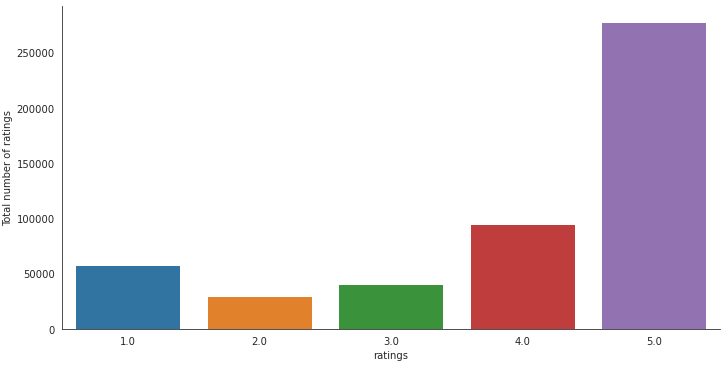

In [8]:
# Checking the distribution of the ratings column
with sns.axes_style('white'):
    g = sns.factorplot("ratings", data=data, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")

## Inferences:-
### 1. Maximum users have given the rating of 5.

In [9]:
# Displaying of unique users and products
print("Total no of ratings :",data.shape[0])
print("Total No of Users   :", len(np.unique(data.userId)))
print("Total No of products  :", len(np.unique(data.productId)))

Total no of ratings : 500000
Total No of Users   : 448368
Total No of products  : 130138


In [10]:
# Analysis of ratings given by user
no_of_rated_products_per_user = data.groupby(by='userId')['ratings'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head(5)

userId
A680RUE1FDO8B     36
A3OXHLG6DIBRW8    34
ADLVFFE4VBT8      30
A5JLAU2ARJ0BO     29
A2NOW4U7W3F7RI    28
Name: ratings, dtype: int64

# Take a subset of the dataset to make it less sparse/ denser.

In [11]:
counts=data.userId.value_counts()
e_df_final=data[data.userId.isin(counts[counts>=25].index)]
print('Number of users who have rated 25 or more items =', len(e_df_final))
print('Number of unique users in the final data = ', e_df_final['userId'].nunique())
print('Number of unique products in the final data = ', e_df_final['userId'].nunique())

Number of users who have rated 25 or more items = 157
Number of unique users in the final data =  5
Number of unique products in the final data =  5


In [12]:
#constructing the pivot table
final_ratings_matrix = e_df_final.pivot(index = 'userId', columns ='productId', values = 'ratings').fillna(0)
final_ratings_matrix.head()

productId,B00004VVGH,B00005T3SM,B000065BPC,B000067DKB,B000069092,B00006DY6J,B00006JQQ6,B000083K9F,B000095SB4,B00009MDBY,...,B00H8O8D96,B00HHRP11C,B00HJ1NQLS,B00HJ4GX10,B00I0Z427E,B00I9V8D92,B00JA4VO9S,B00K6B7KJM,B00KMRGB7C,B00KYMCJF8
userId,,,,,,,,,,,,,,,,,,,,,
A2NOW4U7W3F7RI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0
A3OXHLG6DIBRW8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A5JLAU2ARJ0BO,0.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A680RUE1FDO8B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ADLVFFE4VBT8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0


## Inferences:-
### 1.This shows that it is a sparse matrix. So, many cells are filled with 0 values.

In [13]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (5, 155)


In [14]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  157
possible_num_of_ratings =  775
density: 20.26%


## Inferences:-
### 1.The density value of the matrix shows how much of that is a sparse matrix.

# Build Popularity Recommender model.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(e_df_final, test_size = 0.3, random_state=10)
train_data.head()

,userId,productId,ratings
175598,ADLVFFE4VBT8,B00CD8ADKO,4.0
394315,ADLVFFE4VBT8,B00HJ4GX10,5.0
121544,ADLVFFE4VBT8,B000VMU9VC,5.0
174812,A2NOW4U7W3F7RI,B004W6RLO6,5.0
84226,A2NOW4U7W3F7RI,B00H8O8D96,5.0


In [17]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (109, 3)
Shape of testing data:  (48, 3)


In [18]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId': 'count'}).reset_index()
train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.head(40)

,productId,score
0,B00004VVGH,1
1,B00005T3SM,1
2,B000067DKB,1
3,B000069092,1
4,B00006DY6J,1
5,B00006JQQ6,1
6,B000083K9F,1
7,B000095SB4,1
8,B00009MDBY,1
9,B00009VSBE,1


In [19]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'productId'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations

,productId,score,rank
91,B00CD8ADKO,2,1.0
0,B00004VVGH,1,2.0
1,B00005T3SM,1,3.0
2,B000067DKB,1,4.0
3,B000069092,1,5.0


In [20]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [21]:
find_recom = [10,100,150]   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId: 10

    userId   productId  score  rank
91      10  B00CD8ADKO      2   1.0
0       10  B00004VVGH      1   2.0
1       10  B00005T3SM      1   3.0
2       10  B000067DKB      1   4.0
3       10  B000069092      1   5.0


The list of recommendations for the userId: 100

    userId   productId  score  rank
91     100  B00CD8ADKO      2   1.0
0      100  B00004VVGH      1   2.0
1      100  B00005T3SM      1   3.0
2      100  B000067DKB      1   4.0
3      100  B000069092      1   5.0


The list of recommendations for the userId: 150

    userId   productId  score  rank
91     150  B00CD8ADKO      2   1.0
0      150  B00004VVGH      1   2.0
1      150  B00005T3SM      1   3.0
2      150  B000067DKB      1   4.0
3      150  B000069092      1   5.0




## Inferences:-
### 1.Since, it is a Popularity recommender model, so, all the three users are given the same recommendations. Here, we predict the products based on the popularity. It is not personalized to particular user. It is a non-personalized recommender system.

# Split the data randomly into train and test dataset.

In [22]:
#Getting the new dataframe which contains products with 30 or more ratings
prod_df=data.groupby("productId").filter(lambda x:x['ratings'].count() >=30)

In [23]:
#Getting the new dataframe which contains users who has given 5 or more product ratings
user_df=data.groupby("userId").filter(lambda x:x['ratings'].count() >=5)

In [24]:
prod_df.shape

(151121, 3)

In [25]:
user_df.shape

(8447, 3)

In [26]:
from surprise import Dataset,Reader
from surprise.model_selection import train_test_split

In [27]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
pdf = Dataset.load_from_df(prod_df,reader)
udf = Dataset.load_from_df(user_df,reader)

In [28]:
trainset_p, testset_p = train_test_split(pdf, test_size=.25,random_state=10)
trainset_u, testset_u = train_test_split(udf, test_size=.25,random_state=10)

# Build Collaborative Filtering model.

In [29]:
from surprise import KNNWithMeans
from surprise import SVD
from surprise import accuracy

## Item- Item Collaborative Filtering
### KNNWithMeans Model 

In [30]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_p)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [31]:
test_pred_i = algo.test(testset_p)

In [32]:
test_pred_i

[Prediction(uid='ATEG9BY16E5KL', iid='B002HHLOWC', r_ui=5.0, est=4.166728427739545, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3CEZU5E6A5CTU', iid='B0017JY5FE', r_ui=1.0, est=4.166728427739545, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3F7LADLRB7QV4', iid='B005DSPLDA', r_ui=5.0, est=4.166728427739545, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A15NXB3LWBTF0D', iid='B005QBK63Y', r_ui=5.0, est=4.166728427739545, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3CII8NIL6C2ZJ', iid='B004KA8Y4U', r_ui=5.0, est=4.166728427739545, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1X4R1YQ1RSE0G', iid='B000Z80ICM', r_ui=5.0, est=4.166728427739545, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A137YYTVK60W

## User- User Collaborative Filtering
### KNNWithMeans

In [33]:
algo = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset_u)

test_pred_u = algo.test(testset_u)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [34]:
test_pred_u

[Prediction(uid='A291XTI6NO7DEG', iid='B00003CWDU', r_ui=5.0, est=4.254775059194949, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3Q4TYJVAM4IRM', iid='B0038RN0PO', r_ui=3.0, est=4.254775059194949, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2NOW4U7W3F7RI', iid='B0040QE998', r_ui=5.0, est=4.254775059194949, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A13WOT3RSXKRD5', iid='B007NZGPAY', r_ui=5.0, est=4.254775059194949, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AC2278WPK3EU', iid='B0052R63MK', r_ui=5.0, est=4.254775059194949, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1VOFY3QFT9WCG', iid='B007NZGPAY', r_ui=5.0, est=4.254775059194949, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A182BL642WB69

## Item - Item Collaborative Filtering
### SVD Model

In [35]:
svd_model = SVD(n_factors=100)
svd_model.fit(trainset_p)

predictions_i = svd_model.test(testset_p)

In [36]:
predictions_i

[Prediction(uid='ATEG9BY16E5KL', iid='B002HHLOWC', r_ui=5.0, est=4.00239266116794, details={'was_impossible': False}),
 Prediction(uid='A3CEZU5E6A5CTU', iid='B0017JY5FE', r_ui=1.0, est=4.131062667605236, details={'was_impossible': False}),
 Prediction(uid='A3F7LADLRB7QV4', iid='B005DSPLDA', r_ui=5.0, est=4.6008325339136205, details={'was_impossible': False}),
 Prediction(uid='A15NXB3LWBTF0D', iid='B005QBK63Y', r_ui=5.0, est=4.663060276832686, details={'was_impossible': False}),
 Prediction(uid='A3CII8NIL6C2ZJ', iid='B004KA8Y4U', r_ui=5.0, est=4.009877769563783, details={'was_impossible': False}),
 Prediction(uid='A1X4R1YQ1RSE0G', iid='B000Z80ICM', r_ui=5.0, est=4.30905616477031, details={'was_impossible': False}),
 Prediction(uid='A137YYTVK60W9M', iid='B002RYYZZS', r_ui=5.0, est=3.4576379264427883, details={'was_impossible': False}),
 Prediction(uid='ADCN0S2POUBPI', iid='B009V17TH6', r_ui=5.0, est=3.791740260429288, details={'was_impossible': False}),
 Prediction(uid='A2CCZ8YURSV79E', 

## User - User Collaborative Filtering
### SVD Model

In [37]:
svd_model = SVD(n_factors=100)
svd_model.fit(trainset_u)

predictions_u = svd_model.test(testset_u)

In [38]:
predictions_u

[Prediction(uid='A291XTI6NO7DEG', iid='B00003CWDU', r_ui=5.0, est=4.417640439139701, details={'was_impossible': False}),
 Prediction(uid='A3Q4TYJVAM4IRM', iid='B0038RN0PO', r_ui=3.0, est=4.341005955558162, details={'was_impossible': False}),
 Prediction(uid='A2NOW4U7W3F7RI', iid='B0040QE998', r_ui=5.0, est=4.531172110841596, details={'was_impossible': False}),
 Prediction(uid='A13WOT3RSXKRD5', iid='B007NZGPAY', r_ui=5.0, est=4.392868631108607, details={'was_impossible': False}),
 Prediction(uid='AC2278WPK3EU', iid='B0052R63MK', r_ui=5.0, est=4.389836956398676, details={'was_impossible': False}),
 Prediction(uid='A1VOFY3QFT9WCG', iid='B007NZGPAY', r_ui=5.0, est=4.357596871755719, details={'was_impossible': False}),
 Prediction(uid='A182BL642WB691', iid='B003MCSVI6', r_ui=4.0, est=4.192154379231269, details={'was_impossible': False}),
 Prediction(uid='A203OCQQ12MAVT', iid='B000YB862E', r_ui=5.0, est=4.161123659993378, details={'was_impossible': False}),
 Prediction(uid='AYB4ELCS5AM8P', i

# Evaluate the above model.

In [39]:
# Calculating RMSE
print("Item-bassed Model : Test Set")
accuracy.rmse(test_pred_i, verbose=True)
print("User-bassed Model : Test Set")
accuracy.rmse(test_pred_u, verbose=True)

Item-bassed Model : Test Set
RMSE: 1.2986
User-bassed Model : Test Set
RMSE: 1.1553


1.1552959359069617

In [40]:
print("SVD Model Item Based : Test Set")
accuracy.rmse(predictions_i, verbose=True)
print("SVD Model User Based : Test Set")
accuracy.rmse(predictions_u, verbose=True)

SVD Model Item Based : Test Set
RMSE: 1.2419
SVD Model User Based : Test Set
RMSE: 1.0779


1.0778907735628587

## Inferences:-
### 1. RMSE value is lower for User-User collaborative filtering be it KNNWithMeans or SVD .
### 2. SVD model yields better results for Item & User based compared to KNNWithMeans.
### 2. SVD model User based has the least value amoung all the four models.

# Get top - K ( K = 5) recommendations. Recommend 5 new products.

In [41]:
predictions_u = pd.DataFrame(predictions_u)

In [42]:
type(predictions_u)

pandas.core.frame.DataFrame

In [43]:
predictions_u.sample(10)

,uid,iid,r_ui,est,details
1997,AHGYNZ1588WLB,B008FF88VU,5.0,4.272224,{'was_impossible': False}
1866,AJOA5W5YFUCCV,B008B488DI,5.0,4.397882,{'was_impossible': False}
1654,AZBXKUH4AIW3X,B000VX6XL6,5.0,4.380783,{'was_impossible': False}
151,A3R7RE5O61M112,B005S6XUXA,5.0,4.290000,{'was_impossible': False}
1036,A15G6CALF7DDUC,B000ND93DO,1.0,4.211320,{'was_impossible': False}
1072,A1R4830GBU8UIM,B006OSQALU,4.0,4.177888,{'was_impossible': False}
2057,A1UEL5C1N6E5SE,B0069ABLF8,5.0,4.180070,{'was_impossible': False}
1433,A9LNWA25IM2DX,B005NCNDNQ,4.0,3.942838,{'was_impossible': False}
533,AC6Z7DP1Z5GHD,B001MYLCO6,3.0,4.480894,{'was_impossible': False}
1360,AF76AAXINSF5E,B0088O721K,5.0,4.299985,{'was_impossible': False}


In [44]:
def get_reccomedations(userId,num):
  user_rec = predictions_u[predictions_u['uid'] == userId][['uid','iid','r_ui','est']].sort_values(by = 'est',ascending = False).head(num)
  return user_rec

In [45]:
get_reccomedations("A30X750M8V1XXW", 5)

,uid,iid,r_ui,est
255,A30X750M8V1XXW,B000V9NU2A,5.0,4.292296
565,A30X750M8V1XXW,B001UFYFYG,4.0,4.292296
897,A30X750M8V1XXW,B007X3VEUW,2.0,4.292296
1365,A30X750M8V1XXW,B001UI4EQC,4.0,4.292296
2055,A30X750M8V1XXW,B001KUL012,5.0,4.161163


## Inferences:-
### 1. Getting personalised recommendation based on users.

# Summarise your insights.

## Inferences:-
### 1.The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user.
### 2.The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history.
### 3.Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.